In [1]:
#  Loading the Data
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.info()
# Cleaning the Data
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())
df[['Glucose','BloodPressure','SkinThickness',
 'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
 df[['Glucose','BloodPressure','SkinThickness',
 'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.fillna(df.mean(), inplace = True) 
print(df.eq(0).sum())
corr = df.corr()
print(corr)
#Plotting the Correlation Between Features(Lập biểu đồ tương quan giữa các đối tượng)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age               

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14780\2433241221.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


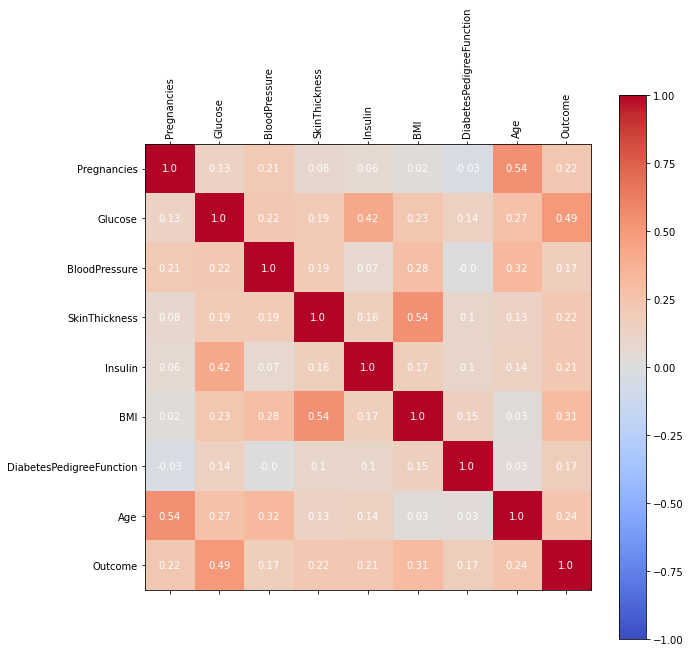

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")
plt.show()

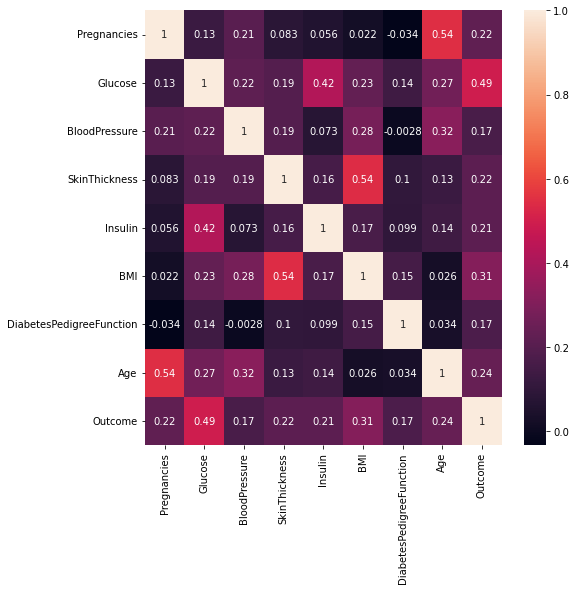

In [3]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

In [4]:
print(df.corr().nlargest(4, 'Outcome').index)


Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


In [5]:
print(df.corr().nlargest(4, 'Outcome').values[:,8])

[1.         0.49292767 0.31192439 0.23835598]


In [6]:
X = df[['Glucose','BMI','Age']]
y = df.iloc[:,8] # lấy tất cả các hàng và 8 cột


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout 
model = Sequential()
model.add(Dense(40,input_dim=3,activation="relu")) # sử dụng relu để khử tuyến tính
model.add(Dropout(0.2))
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid")) 
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train,y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

model.summary()
model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(X_train, y_train,epochs=2000,batch_size= 4,validation_data=(X_val,y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                160       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
123/123 [==============================] 

123/123 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6640 - val_loss: 0.6102 - val_accuracy: 0.7073
Epoch 51/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.6782 - val_loss: 0.6204 - val_accuracy: 0.6911
Epoch 52/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6864 - val_loss: 0.6101 - val_accuracy: 0.7236
Epoch 53/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6782 - val_loss: 0.6125 - val_accuracy: 0.6992
Epoch 54/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.6578 - val_loss: 0.6128 - val_accuracy: 0.7073
Epoch 55/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.6945 - val_loss: 0.6084 - val_accuracy: 0.6992
Epoch 56/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.6436 - val_loss: 0.6033 - val_accuracy: 0.7236

123/123 [==============================] - 0s 991us/step - loss: 0.5862 - accuracy: 0.6843 - val_loss: 0.5805 - val_accuracy: 0.6829
Epoch 107/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5766 - accuracy: 0.7047 - val_loss: 0.5814 - val_accuracy: 0.7073
Epoch 108/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.6904 - val_loss: 0.5910 - val_accuracy: 0.7154
Epoch 109/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.6986 - val_loss: 0.5838 - val_accuracy: 0.7073
Epoch 110/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7189 - val_loss: 0.5820 - val_accuracy: 0.6585
Epoch 111/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7108 - val_loss: 0.5724 - val_accuracy: 0.6992
Epoch 112/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.6741 - val_loss: 0.5773 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.7251 - val_loss: 0.5474 - val_accuracy: 0.7317
Epoch 163/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7393 - val_loss: 0.5502 - val_accuracy: 0.7317
Epoch 164/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7332 - val_loss: 0.5554 - val_accuracy: 0.7154
Epoch 165/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7088 - val_loss: 0.5506 - val_accuracy: 0.7154
Epoch 166/2000
123/123 [==============================] - 0s 991us/step - loss: 0.5462 - accuracy: 0.7108 - val_loss: 0.6015 - val_accuracy: 0.6748
Epoch 167/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7271 - val_loss: 0.5393 - val_accuracy: 0.7398
Epoch 168/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7475 - val_loss: 0.5451 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.7332 - val_loss: 0.5804 - val_accuracy: 0.6992
Epoch 219/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7373 - val_loss: 0.5762 - val_accuracy: 0.6992
Epoch 220/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7739 - val_loss: 0.5523 - val_accuracy: 0.7236
Epoch 221/2000
123/123 [==============================] - 0s 975us/step - loss: 0.5261 - accuracy: 0.7271 - val_loss: 0.5955 - val_accuracy: 0.6992
Epoch 222/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7373 - val_loss: 0.5628 - val_accuracy: 0.6992
Epoch 223/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.7291 - val_loss: 0.5643 - val_accuracy: 0.6992
Epoch 224/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.7434 - val_loss: 0.5508 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7576 - val_loss: 0.5809 - val_accuracy: 0.7073
Epoch 275/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.7454 - val_loss: 0.5622 - val_accuracy: 0.7154
Epoch 276/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7515 - val_loss: 0.5427 - val_accuracy: 0.7236
Epoch 277/2000
123/123 [==============================] - 0s 991us/step - loss: 0.5214 - accuracy: 0.7413 - val_loss: 0.5391 - val_accuracy: 0.7398
Epoch 278/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.7475 - val_loss: 0.5494 - val_accuracy: 0.7073
Epoch 279/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5277 - accuracy: 0.7352 - val_loss: 0.5363 - val_accuracy: 0.7154
Epoch 280/2000
123/123 [==============================] - 0s 972us/step - loss: 0.5203 - accuracy: 0.7352 - val_loss: 0.5399 - val_accura

123/123 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7780 - val_loss: 0.5796 - val_accuracy: 0.6911
Epoch 331/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7637 - val_loss: 0.5582 - val_accuracy: 0.7236
Epoch 332/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7719 - val_loss: 0.5809 - val_accuracy: 0.6992
Epoch 333/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7454 - val_loss: 0.5842 - val_accuracy: 0.6992
Epoch 334/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7536 - val_loss: 0.5688 - val_accuracy: 0.7073
Epoch 335/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7495 - val_loss: 0.6094 - val_accuracy: 0.6992
Epoch 336/2000
123/123 [==============================] - 0s 956us/step - loss: 0.5012 - accuracy: 0.7617 - val_loss: 0.5748 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7658 - val_loss: 0.5701 - val_accuracy: 0.6992
Epoch 387/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.7413 - val_loss: 0.5844 - val_accuracy: 0.6829
Epoch 388/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7576 - val_loss: 0.5965 - val_accuracy: 0.6992
Epoch 389/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7719 - val_loss: 0.5734 - val_accuracy: 0.7073
Epoch 390/2000
123/123 [==============================] - 0s 992us/step - loss: 0.4853 - accuracy: 0.7780 - val_loss: 0.6230 - val_accuracy: 0.6911
Epoch 391/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7291 - val_loss: 0.5823 - val_accuracy: 0.6911
Epoch 392/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7536 - val_loss: 0.5557 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.7352 - val_loss: 0.5951 - val_accuracy: 0.6829
Epoch 443/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.7495 - val_loss: 0.5861 - val_accuracy: 0.6911
Epoch 444/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.7454 - val_loss: 0.5811 - val_accuracy: 0.6911
Epoch 445/2000
123/123 [==============================] - 0s 974us/step - loss: 0.5099 - accuracy: 0.7597 - val_loss: 0.5619 - val_accuracy: 0.6911
Epoch 446/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7495 - val_loss: 0.5694 - val_accuracy: 0.6911
Epoch 447/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7576 - val_loss: 0.5553 - val_accuracy: 0.7154
Epoch 448/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7597 - val_loss: 0.5532 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.7658 - val_loss: 0.5981 - val_accuracy: 0.7073
Epoch 499/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7536 - val_loss: 0.5838 - val_accuracy: 0.6911
Epoch 500/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.7536 - val_loss: 0.5526 - val_accuracy: 0.6992
Epoch 501/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7576 - val_loss: 0.6363 - val_accuracy: 0.6829
Epoch 502/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7515 - val_loss: 0.5723 - val_accuracy: 0.6992
Epoch 503/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5071 - accuracy: 0.7515 - val_loss: 0.5695 - val_accuracy: 0.6829
Epoch 504/2000
123/123 [==============================] - 0s 991us/step - loss: 0.5063 - accuracy: 0.7454 - val_loss: 0.6068 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7617 - val_loss: 0.5776 - val_accuracy: 0.6992
Epoch 555/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7739 - val_loss: 0.5406 - val_accuracy: 0.6992
Epoch 556/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7678 - val_loss: 0.5683 - val_accuracy: 0.7073
Epoch 557/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.7312 - val_loss: 0.5755 - val_accuracy: 0.6992
Epoch 558/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7576 - val_loss: 0.5911 - val_accuracy: 0.6992
Epoch 559/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7658 - val_loss: 0.5773 - val_accuracy: 0.6911
Epoch 560/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7576 - val_loss: 0.5926 - val_accuracy: 

123/123 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7902 - val_loss: 0.5492 - val_accuracy: 0.7154
Epoch 611/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7780 - val_loss: 0.5793 - val_accuracy: 0.7073
Epoch 612/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7882 - val_loss: 0.5494 - val_accuracy: 0.6911
Epoch 613/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7862 - val_loss: 0.5845 - val_accuracy: 0.6992
Epoch 614/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7841 - val_loss: 0.5399 - val_accuracy: 0.6992
Epoch 615/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7719 - val_loss: 0.5623 - val_accuracy: 0.7073
Epoch 616/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7760 - val_loss: 0.5700 - val_accuracy: 

123/123 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7454 - val_loss: 0.5522 - val_accuracy: 0.6911
Epoch 667/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.7882 - val_loss: 0.5729 - val_accuracy: 0.6829
Epoch 668/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7597 - val_loss: 0.5615 - val_accuracy: 0.6992
Epoch 669/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7597 - val_loss: 0.5570 - val_accuracy: 0.6911
Epoch 670/2000
123/123 [==============================] - 0s 992us/step - loss: 0.4734 - accuracy: 0.7597 - val_loss: 0.5996 - val_accuracy: 0.6748
Epoch 671/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7536 - val_loss: 0.6116 - val_accuracy: 0.6748
Epoch 672/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7699 - val_loss: 0.5923 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7373 - val_loss: 0.5627 - val_accuracy: 0.6829
Epoch 723/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7719 - val_loss: 0.5660 - val_accuracy: 0.6992
Epoch 724/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.7576 - val_loss: 0.5358 - val_accuracy: 0.7073
Epoch 725/2000
123/123 [==============================] - 0s 992us/step - loss: 0.4820 - accuracy: 0.7617 - val_loss: 0.5738 - val_accuracy: 0.6992
Epoch 726/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7719 - val_loss: 0.5580 - val_accuracy: 0.6911
Epoch 727/2000
123/123 [==============================] - 0s 956us/step - loss: 0.4842 - accuracy: 0.7454 - val_loss: 0.6027 - val_accuracy: 0.6829
Epoch 728/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7923 - val_loss: 0.6046 - val_accura

123/123 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7617 - val_loss: 0.5776 - val_accuracy: 0.6829
Epoch 779/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7719 - val_loss: 0.5642 - val_accuracy: 0.6992
Epoch 780/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7800 - val_loss: 0.5592 - val_accuracy: 0.6992
Epoch 781/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7617 - val_loss: 0.5744 - val_accuracy: 0.6992
Epoch 782/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7678 - val_loss: 0.5932 - val_accuracy: 0.6992
Epoch 783/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7780 - val_loss: 0.5677 - val_accuracy: 0.7154
Epoch 784/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7760 - val_loss: 0.6031 - val_accuracy: 

123/123 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7678 - val_loss: 0.5808 - val_accuracy: 0.6748
Epoch 835/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7739 - val_loss: 0.5702 - val_accuracy: 0.6992
Epoch 836/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.7597 - val_loss: 0.5947 - val_accuracy: 0.6748
Epoch 837/2000
123/123 [==============================] - 0s 983us/step - loss: 0.4828 - accuracy: 0.7576 - val_loss: 0.5545 - val_accuracy: 0.6992
Epoch 838/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7678 - val_loss: 0.5805 - val_accuracy: 0.6992
Epoch 839/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.7515 - val_loss: 0.6194 - val_accuracy: 0.6911
Epoch 840/2000
123/123 [==============================] - 0s 994us/step - loss: 0.4990 - accuracy: 0.7515 - val_loss: 0.6008 - val_accura

123/123 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7780 - val_loss: 0.5469 - val_accuracy: 0.7236
Epoch 891/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.7780 - val_loss: 0.5438 - val_accuracy: 0.6992
Epoch 892/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7658 - val_loss: 0.5820 - val_accuracy: 0.6829
Epoch 893/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7597 - val_loss: 0.5810 - val_accuracy: 0.6992
Epoch 894/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7678 - val_loss: 0.5658 - val_accuracy: 0.7073
Epoch 895/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7637 - val_loss: 0.5430 - val_accuracy: 0.7154
Epoch 896/2000
123/123 [==============================] - 0s 956us/step - loss: 0.4923 - accuracy: 0.7678 - val_loss: 0.6147 - val_accuracy

123/123 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.7800 - val_loss: 0.5641 - val_accuracy: 0.6992
Epoch 947/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7475 - val_loss: 0.6033 - val_accuracy: 0.6911
Epoch 948/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7332 - val_loss: 0.5644 - val_accuracy: 0.6992
Epoch 949/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7515 - val_loss: 0.5546 - val_accuracy: 0.6992
Epoch 950/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7739 - val_loss: 0.5750 - val_accuracy: 0.6911
Epoch 951/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7637 - val_loss: 0.5427 - val_accuracy: 0.7073
Epoch 952/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7597 - val_loss: 0.5933 - val_accuracy: 

123/123 [==============================] - 0s 967us/step - loss: 0.4596 - accuracy: 0.7862 - val_loss: 0.5733 - val_accuracy: 0.7073
Epoch 1003/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7597 - val_loss: 0.5801 - val_accuracy: 0.6992
Epoch 1004/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7475 - val_loss: 0.6118 - val_accuracy: 0.6829
Epoch 1005/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7597 - val_loss: 0.5870 - val_accuracy: 0.6992
Epoch 1006/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.7780 - val_loss: 0.5450 - val_accuracy: 0.7073
Epoch 1007/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7678 - val_loss: 0.5665 - val_accuracy: 0.7073
Epoch 1008/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7475 - val_loss: 0.5776 - val_ac

Epoch 1058/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7556 - val_loss: 0.5719 - val_accuracy: 0.6911
Epoch 1059/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7475 - val_loss: 0.5751 - val_accuracy: 0.6992
Epoch 1060/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7576 - val_loss: 0.5523 - val_accuracy: 0.6992
Epoch 1061/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7576 - val_loss: 0.5611 - val_accuracy: 0.6992
Epoch 1062/2000
123/123 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7475 - val_loss: 0.5950 - val_accuracy: 0.6748
Epoch 1063/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7271 - val_loss: 0.5940 - val_accuracy: 0.6748
Epoch 1064/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7515 - val_loss: 0

123/123 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.7495 - val_loss: 0.5654 - val_accuracy: 0.7073
Epoch 1114/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7678 - val_loss: 0.6050 - val_accuracy: 0.6992
Epoch 1115/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7699 - val_loss: 0.6011 - val_accuracy: 0.6911
Epoch 1116/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7597 - val_loss: 0.5991 - val_accuracy: 0.6911
Epoch 1117/2000
123/123 [==============================] - 0s 981us/step - loss: 0.4977 - accuracy: 0.7556 - val_loss: 0.5506 - val_accuracy: 0.6992
Epoch 1118/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7699 - val_loss: 0.5692 - val_accuracy: 0.6992
Epoch 1119/2000
123/123 [==============================] - 0s 993us/step - loss: 0.4899 - accuracy: 0.7617 - val_loss: 0.5752 - val_

123/123 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7597 - val_loss: 0.5354 - val_accuracy: 0.7236
Epoch 1169/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.7475 - val_loss: 0.5724 - val_accuracy: 0.6992
Epoch 1170/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7862 - val_loss: 0.6117 - val_accuracy: 0.6829
Epoch 1171/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7678 - val_loss: 0.5560 - val_accuracy: 0.7073
Epoch 1172/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.7699 - val_loss: 0.5873 - val_accuracy: 0.6748
Epoch 1173/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.7576 - val_loss: 0.5598 - val_accuracy: 0.7154
Epoch 1174/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7739 - val_loss: 0.5677 - val_accu

Epoch 1224/2000
123/123 [==============================] - 0s 959us/step - loss: 0.4681 - accuracy: 0.7800 - val_loss: 0.5752 - val_accuracy: 0.6992
Epoch 1225/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7617 - val_loss: 0.5286 - val_accuracy: 0.7236
Epoch 1226/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7780 - val_loss: 0.5770 - val_accuracy: 0.7154
Epoch 1227/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.7800 - val_loss: 0.5579 - val_accuracy: 0.7073
Epoch 1228/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7821 - val_loss: 0.5265 - val_accuracy: 0.7236
Epoch 1229/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7699 - val_loss: 0.5772 - val_accuracy: 0.6992
Epoch 1230/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7699 - val_loss:

123/123 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7475 - val_loss: 0.5614 - val_accuracy: 0.6911
Epoch 1280/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7841 - val_loss: 0.5397 - val_accuracy: 0.6911
Epoch 1281/2000
123/123 [==============================] - 0s 934us/step - loss: 0.4764 - accuracy: 0.7637 - val_loss: 0.5433 - val_accuracy: 0.6911
Epoch 1282/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7536 - val_loss: 0.5629 - val_accuracy: 0.6992
Epoch 1283/2000
123/123 [==============================] - 0s 986us/step - loss: 0.4742 - accuracy: 0.7597 - val_loss: 0.5624 - val_accuracy: 0.6992
Epoch 1284/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.7454 - val_loss: 0.5300 - val_accuracy: 0.7154
Epoch 1285/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7780 - val_loss: 0.5529 - val_

123/123 [==============================] - 0s 994us/step - loss: 0.4739 - accuracy: 0.7760 - val_loss: 0.5710 - val_accuracy: 0.6992
Epoch 1335/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7862 - val_loss: 0.5655 - val_accuracy: 0.7154
Epoch 1336/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.7678 - val_loss: 0.5418 - val_accuracy: 0.6992
Epoch 1337/2000
123/123 [==============================] - 0s 952us/step - loss: 0.4574 - accuracy: 0.7699 - val_loss: 0.5350 - val_accuracy: 0.6992
Epoch 1338/2000
123/123 [==============================] - 0s 984us/step - loss: 0.4701 - accuracy: 0.7780 - val_loss: 0.5578 - val_accuracy: 0.7154
Epoch 1339/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7597 - val_loss: 0.5593 - val_accuracy: 0.6992
Epoch 1340/2000
123/123 [==============================] - 0s 993us/step - loss: 0.4763 - accuracy: 0.7739 - val_loss: 0.5638 - 

Epoch 1390/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.7841 - val_loss: 0.5695 - val_accuracy: 0.7154
Epoch 1391/2000
123/123 [==============================] - 0s 981us/step - loss: 0.4717 - accuracy: 0.7678 - val_loss: 0.5705 - val_accuracy: 0.7154
Epoch 1392/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7821 - val_loss: 0.5427 - val_accuracy: 0.7154
Epoch 1393/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7902 - val_loss: 0.5857 - val_accuracy: 0.6911
Epoch 1394/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7882 - val_loss: 0.5480 - val_accuracy: 0.7154
Epoch 1395/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7963 - val_loss: 0.5628 - val_accuracy: 0.6992
Epoch 1396/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7576 - val_loss:

Epoch 1446/2000
123/123 [==============================] - 0s 959us/step - loss: 0.4762 - accuracy: 0.7597 - val_loss: 0.5499 - val_accuracy: 0.6992
Epoch 1447/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7882 - val_loss: 0.5388 - val_accuracy: 0.7073
Epoch 1448/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7984 - val_loss: 0.5562 - val_accuracy: 0.7073
Epoch 1449/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7617 - val_loss: 0.5443 - val_accuracy: 0.6992
Epoch 1450/2000
123/123 [==============================] - 0s 999us/step - loss: 0.4749 - accuracy: 0.7719 - val_loss: 0.5285 - val_accuracy: 0.7317
Epoch 1451/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7821 - val_loss: 0.5319 - val_accuracy: 0.7317
Epoch 1452/2000
123/123 [==============================] - 0s 977us/step - loss: 0.4655 - accuracy: 0.7862 - val_l

123/123 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7678 - val_loss: 0.5951 - val_accuracy: 0.6992
Epoch 1502/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7576 - val_loss: 0.5560 - val_accuracy: 0.7154
Epoch 1503/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7780 - val_loss: 0.5435 - val_accuracy: 0.7236
Epoch 1504/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7800 - val_loss: 0.5874 - val_accuracy: 0.7073
Epoch 1505/2000
123/123 [==============================] - 0s 983us/step - loss: 0.4650 - accuracy: 0.7780 - val_loss: 0.5493 - val_accuracy: 0.6992
Epoch 1506/2000
123/123 [==============================] - 0s 984us/step - loss: 0.4916 - accuracy: 0.7393 - val_loss: 0.5500 - val_accuracy: 0.6992
Epoch 1507/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7760 - val_loss: 0.5466 - val_

Epoch 1557/2000
123/123 [==============================] - 0s 999us/step - loss: 0.4643 - accuracy: 0.7841 - val_loss: 0.5519 - val_accuracy: 0.6992
Epoch 1558/2000
123/123 [==============================] - 0s 984us/step - loss: 0.4576 - accuracy: 0.7902 - val_loss: 0.5587 - val_accuracy: 0.7073
Epoch 1559/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7556 - val_loss: 0.5386 - val_accuracy: 0.7073
Epoch 1560/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7576 - val_loss: 0.5872 - val_accuracy: 0.6992
Epoch 1561/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7597 - val_loss: 0.5397 - val_accuracy: 0.7073
Epoch 1562/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7658 - val_loss: 0.5505 - val_accuracy: 0.6992
Epoch 1563/2000
123/123 [==============================] - 0s 982us/step - loss: 0.4752 - accuracy: 0.7617 - val_l

123/123 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7515 - val_loss: 0.5434 - val_accuracy: 0.7073
Epoch 1613/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7617 - val_loss: 0.5460 - val_accuracy: 0.7073
Epoch 1614/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7597 - val_loss: 0.5610 - val_accuracy: 0.7073
Epoch 1615/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7719 - val_loss: 0.5462 - val_accuracy: 0.6992
Epoch 1616/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7434 - val_loss: 0.5576 - val_accuracy: 0.7073
Epoch 1617/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7637 - val_loss: 0.5540 - val_accuracy: 0.6992
Epoch 1618/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7719 - val_loss: 0.5247 - val_accu

Epoch 1668/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7699 - val_loss: 0.5549 - val_accuracy: 0.7236
Epoch 1669/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7780 - val_loss: 0.5827 - val_accuracy: 0.6992
Epoch 1670/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7780 - val_loss: 0.6026 - val_accuracy: 0.6911
Epoch 1671/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7739 - val_loss: 0.5585 - val_accuracy: 0.7073
Epoch 1672/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7658 - val_loss: 0.5727 - val_accuracy: 0.6992
Epoch 1673/2000
123/123 [==============================] - 0s 984us/step - loss: 0.4675 - accuracy: 0.7800 - val_loss: 0.5371 - val_accuracy: 0.7317
Epoch 1674/2000
123/123 [==============================] - 0s 982us/step - loss: 0.4625 - accuracy: 0.7800 - val_los

123/123 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7678 - val_loss: 0.5489 - val_accuracy: 0.7073
Epoch 1724/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7862 - val_loss: 0.5685 - val_accuracy: 0.7154
Epoch 1725/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7719 - val_loss: 0.5731 - val_accuracy: 0.6911
Epoch 1726/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.7699 - val_loss: 0.5432 - val_accuracy: 0.7073
Epoch 1727/2000
123/123 [==============================] - 0s 984us/step - loss: 0.4787 - accuracy: 0.7739 - val_loss: 0.5434 - val_accuracy: 0.7154
Epoch 1728/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7821 - val_loss: 0.5645 - val_accuracy: 0.7073
Epoch 1729/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7902 - val_loss: 0.5771 - val_ac

123/123 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.7882 - val_loss: 0.5468 - val_accuracy: 0.7073
Epoch 1779/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7800 - val_loss: 0.5654 - val_accuracy: 0.6992
Epoch 1780/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7678 - val_loss: 0.5781 - val_accuracy: 0.6992
Epoch 1781/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7576 - val_loss: 0.5671 - val_accuracy: 0.7073
Epoch 1782/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7719 - val_loss: 0.5632 - val_accuracy: 0.6992
Epoch 1783/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7841 - val_loss: 0.5652 - val_accuracy: 0.7073
Epoch 1784/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7637 - val_loss: 0.5606 - val_accu

123/123 [==============================] - 0s 999us/step - loss: 0.4846 - accuracy: 0.7780 - val_loss: 0.5679 - val_accuracy: 0.7073
Epoch 1834/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.7780 - val_loss: 0.5684 - val_accuracy: 0.7073
Epoch 1835/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7658 - val_loss: 0.5797 - val_accuracy: 0.6992
Epoch 1836/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.7617 - val_loss: 0.5444 - val_accuracy: 0.7398
Epoch 1837/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7719 - val_loss: 0.5433 - val_accuracy: 0.7236
Epoch 1838/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7699 - val_loss: 0.5446 - val_accuracy: 0.7073
Epoch 1839/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7862 - val_loss: 0.5328 - val_ac

Epoch 1889/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7739 - val_loss: 0.5500 - val_accuracy: 0.7073
Epoch 1890/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7556 - val_loss: 0.5478 - val_accuracy: 0.7073
Epoch 1891/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7556 - val_loss: 0.5929 - val_accuracy: 0.6992
Epoch 1892/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7862 - val_loss: 0.5405 - val_accuracy: 0.7154
Epoch 1893/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7760 - val_loss: 0.5655 - val_accuracy: 0.7073
Epoch 1894/2000
123/123 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7637 - val_loss: 0.5639 - val_accuracy: 0.7154
Epoch 1895/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7556 - val_loss: 0

Epoch 1945/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7841 - val_loss: 0.5425 - val_accuracy: 0.7236
Epoch 1946/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7699 - val_loss: 0.5524 - val_accuracy: 0.7154
Epoch 1947/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7780 - val_loss: 0.5607 - val_accuracy: 0.7073
Epoch 1948/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7902 - val_loss: 0.5958 - val_accuracy: 0.6992
Epoch 1949/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7719 - val_loss: 0.5538 - val_accuracy: 0.7236
Epoch 1950/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7515 - val_loss: 0.5516 - val_accuracy: 0.7154
Epoch 1951/2000
123/123 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7739 - val_loss: 0

In [12]:
loss,acc = model.evaluate(X_test,y_test)
print("loss value: ",loss)
print("acc value: ",acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.8377 - accuracy: 0.7727
loss value:  0.8377106189727783
acc value:  0.7727272510528564


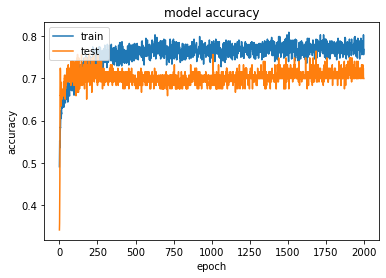

In [13]:
plt.plot(history.history['accuracy']) # giá trị accuracy của tập train
plt.plot(history.history['val_accuracy']) # giá trị accuracy của tập test
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

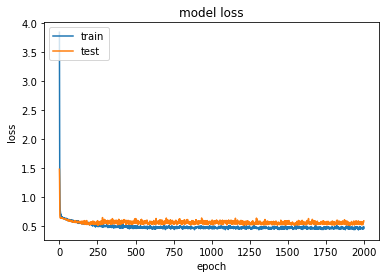

In [14]:
plt.plot(history.history['loss']) # giá trị loss của tập train
plt.plot(history.history['val_loss']) # giá trị loss của tập test
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()